C:\Users\natal\AppData\Local\Temp\ipykernel_29564\712362459.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period='6mo', interval='1d')
[*********************100%***********************]  1 of 1 completed


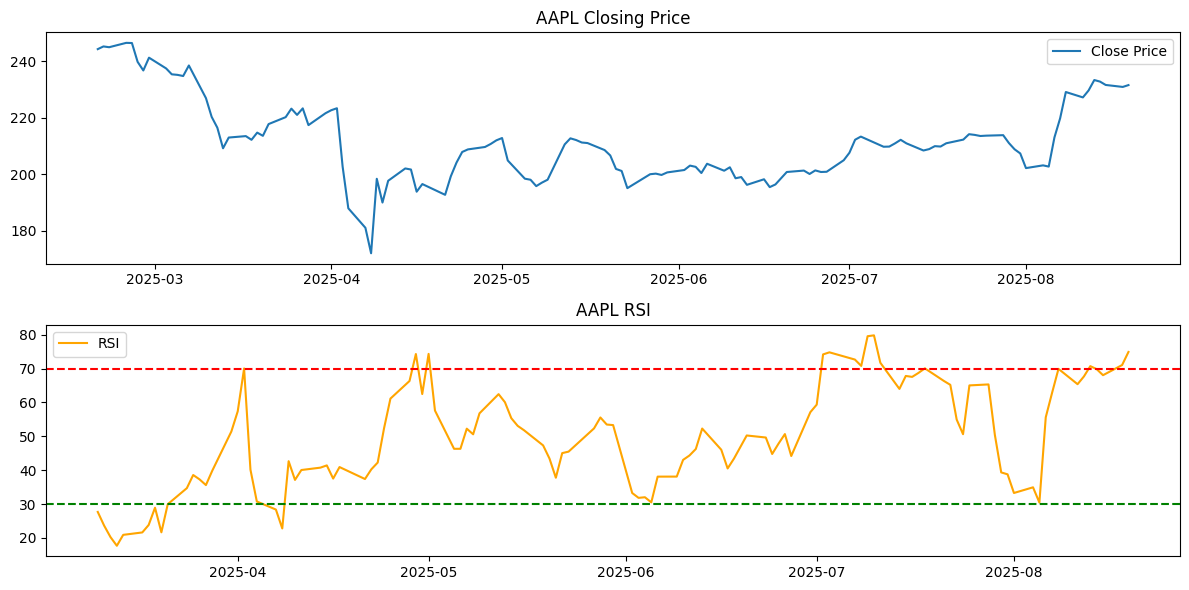

Price,Close,RSI,Signal
Ticker,AAPL,,
Date,,,
2025-08-06,213.008255,55.625199,0
2025-08-07,219.780563,62.889578,0
2025-08-08,229.090012,69.917340,0
2025-08-11,227.179993,65.395758,0
2025-08-12,229.649994,67.682730,0
2025-08-13,233.330002,70.722039,-1
2025-08-14,232.779999,69.842867,0
2025-08-15,231.589996,68.051499,0


In [1]:
# Step 1: Install packages (only need to run once)
# Uncomment the next line if you haven't installed these
# !pip install yfinance pandas matplotlib

# Step 2: Import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 3: Fetch stock data
# Example: Apple (AAPL) last 6 months
ticker = 'AAPL'
data = yf.download(ticker, period='6mo', interval='1d')
data = data[['Close']]  # Keep only closing price

# Step 4: Calculate RSI
def calculate_rsi(df, period=14):
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Step 5: Plot RSI and Closing Price
plt.figure(figsize=(12,6))

# Plot closing price
plt.subplot(2,1,1)
plt.plot(data['Close'], label='Close Price')
plt.title(f'{ticker} Closing Price')
plt.legend()

# Plot RSI
plt.subplot(2,1,2)
plt.plot(data['RSI'], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--')  # Overbought
plt.axhline(30, color='green', linestyle='--') # Oversold
plt.title(f'{ticker} RSI')
plt.legend()

plt.tight_layout()
plt.show()

# Step 6: Optional: Simple RSI strategy signals
data['Signal'] = 0
data.loc[data['RSI'] < 30, 'Signal'] = 1   # Buy
data.loc[data['RSI'] > 70, 'Signal'] = -1  # Sell

# Show last 10 rows
data.tail(10)
